In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
# import labelme
import numpy as np
import os
import json
from PIL import Image, ImageColor
from photo_utils import *
from functions import *

# Determine if the FOV is Static

## Pull random set of images.

In [2]:
drive = '/Volumes/rsstu/users/k/kanarde/Sunnyverse-Images'

In [4]:
create_test_image_set(drive, 'CB_03_static_test_images', 'CAM_CB_03', 1000)

Copying files: 100%|██████████| 1000/1000 [02:15<00:00,  7.37it/s]


In [59]:
create_test_image_set(drive, 'DE_01_static_test_images', 'CAM_DE_01', 1000)

Copying files: 100%|██████████| 1000/1000 [02:55<00:00,  5.69it/s]


In [60]:
create_test_image_set(drive, 'BF_01_static_test_images', 'CAM_BF_01', 1000)

Copying files: 100%|██████████| 1000/1000 [12:29<00:00,  1.33it/s]


## Plot Pixel Transect Location

In [92]:
# Define the directory containing your images
# image_dir = "/Users/ryan/Documents/image_processing/BF_01_static_test_images"
image_dir = "DE_01_static_test_images"
transect_position = 2500  # Y-coordinate for horizontal transect or X-coordinate for vertical transect
transect_direction = 'horizontal'  # 'horizontal' or 'vertical'

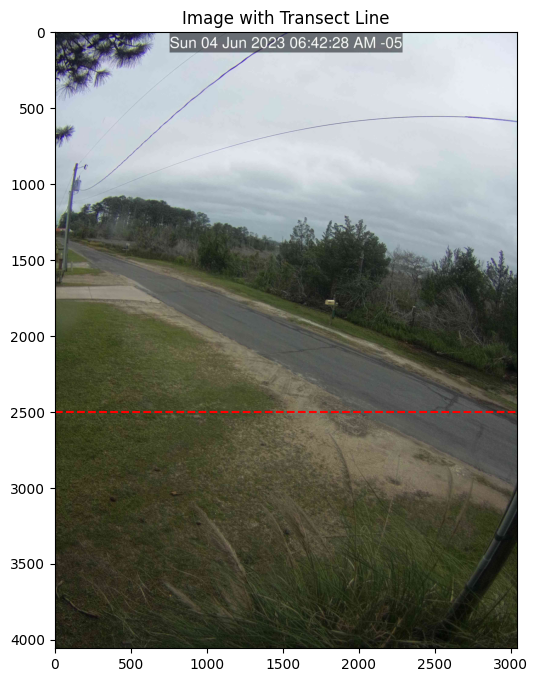

In [93]:
# Load a single image to visualize the transect
image_file = os.path.join(image_dir, os.listdir(image_dir)[0])  # Load the first image for visualization
img = Image.open(image_file)
img_array = np.array(img)

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(img_array)

# Overlay the transect line in red
if transect_direction == 'horizontal':
    plt.axhline(y=transect_position, color='red', linestyle='--')  # Horizontal transect
elif transect_direction == 'vertical':
    plt.axvline(x=transect_position, color='red', linestyle='--')  # Vertical transect

plt.title("Image with Transect Line")
plt.show()


## Plot Transects from Entire Folder

In [19]:
# Get a list of image file paths
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith(('png', 'jpg', 'jpeg', 'tif'))]

# Load the first image to determine the size of the transect array
first_img = Image.open(image_files[0])
first_img_array = np.array(first_img)

if transect_direction == 'horizontal':
    transect_length = first_img_array.shape[1]  # Width of the image
elif transect_direction == 'vertical':
    transect_length = first_img_array.shape[0]  # Height of the image

# Initialize an array to hold all transects
transects = np.zeros((len(image_files), transect_length, 3))

# Loop through each image and extract the transect
for i, image_file in enumerate(image_files):
    img = Image.open(image_file)
    img_array = np.array(img)

    if transect_direction == 'horizontal':
        transects[i, :] = img_array[transect_position, :]  # Extract horizontal transect
    elif transect_direction == 'vertical':
        transects[i, :] = img_array[:, transect_position]  # Extract vertical transect


In [22]:
transects.shape

(1000, 4056, 3)

In [31]:
# Convert float values to 8-bit unsigned integers
transects_int = transects.astype(np.uint8)
plot_transects = np.transpose(transects_int, (1, 0, 2))

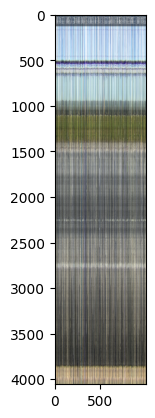

In [32]:
plt.imshow(plot_transects)
plt.show()

## Plot Results from Multiple Transects

In [94]:
transect_positions = [500, 2500, 1500, 2500]
transect_directions = ['vertical', 'vertical', 'horizontal', 'horizontal']

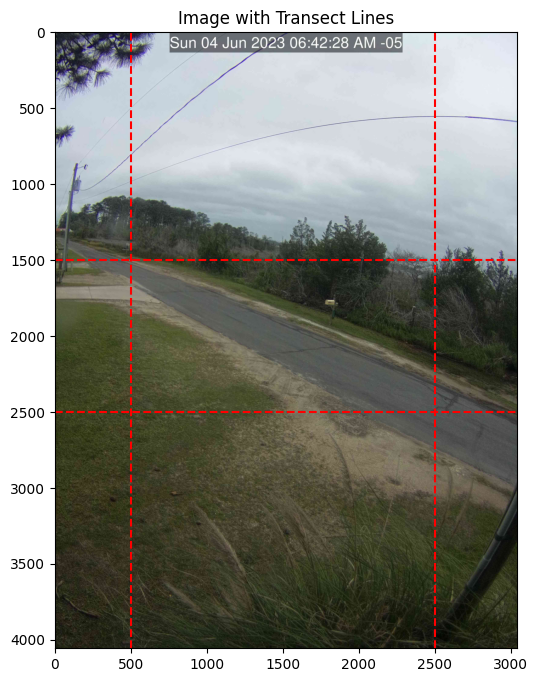

In [95]:
# Load a single image to visualize the transect
image_file = os.path.join(image_dir, os.listdir(image_dir)[0])  # Load the first image for visualization
img = Image.open(image_file)
img_array = np.array(img)

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(img_array)

for position, direction in zip(transect_positions, transect_directions):
# Overlay the transect line in red
    if direction == 'horizontal':
        plt.axhline(y=position, color='red', linestyle='--')  # Horizontal transect
    elif direction == 'vertical':
        plt.axvline(x=position, color='red', linestyle='--')  # Vertical transect

plt.title("Image with Transect Lines")

plt.savefig('DE_01_static_transect_locs.png')
plt.show()

In [96]:
# Get a list of image file paths
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith(('png', 'jpg', 'jpeg', 'tif'))]

# Load the first image to determine the size of the transect array
first_img = Image.open(image_files[0])
first_img_array = np.array(first_img)

transect_arrays = []

for position, direction in zip(transect_positions, transect_directions):
    if direction == 'horizontal':
        transect_length = first_img_array.shape[1]  # Width of the image
    elif direction == 'vertical':
        transect_length = first_img_array.shape[0]  # Height of the image

    # Initialize an array to hold all transects
    transects = np.zeros((len(image_files), transect_length, 3))

    # Loop through each image and extract the transect
    for i, image_file in enumerate(image_files):
        img = Image.open(image_file)
        img_array = np.array(img)

        if direction == 'horizontal':
            transects[i, :] = img_array[position, :]  # Extract horizontal transect
        elif direction == 'vertical':
            transects[i, :] = img_array[:, position]  # Extract vertical transect

    transects_int = transects.astype(np.uint8)
    transect_arrays.append(transects_int)

In [97]:
len(transect_arrays)

4

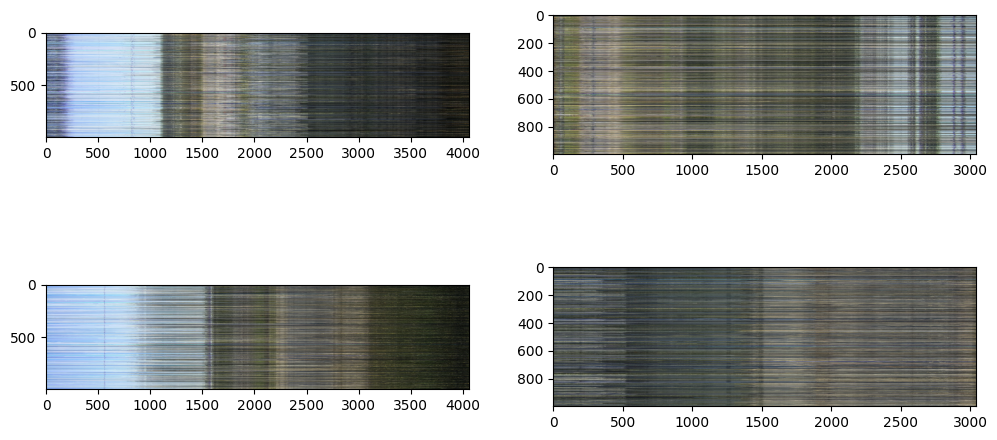

In [98]:
# Create a figure with three subplots side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Plot the original image
axes[0, 0].imshow(transect_arrays[0])
# axes[0].set_title("Original Image")
axes[0, 0].axis('on')  # Optionally remove axes

# Plot the original image
axes[1, 0].imshow(transect_arrays[1])
# axes[0].set_title("Original Image")
axes[1, 0].axis('on')  # Optionally remove axes

# Plot the original image
axes[0, 1].imshow(transect_arrays[2])
# axes[0].set_title("Original Image")
axes[0, 1].axis('on')  # Optionally remove axes

# Plot the original image
axes[1, 1].imshow(transect_arrays[3])
# axes[0].set_title("Original Image")
axes[1, 1].axis('on')  # Optionally remove axes

plt.savefig('DE_01_static_test.png')

# Show the plots
plt.show()



<Figure size 640x480 with 0 Axes>

# Create Roadway Mask

Initial step of drawing polygon for mask has already been completed using labelme.

In [2]:
# Load the LabelMe annotation file
with open('roadway.json') as f:
    data = json.load(f)

# Create an empty mask
img_shape = (data['imageHeight'], data['imageWidth'], 3)
mask = np.zeros(img_shape[:2], dtype=np.uint8)

# Fill the mask with the polygon
for shape in data['shapes']:
    points = shape['points']
    points = np.array(points, dtype=np.int32)
    cv2.fillPoly(mask, [points], color=(255))

# Save the mask
mask = Image.fromarray(mask)
mask.save('roadway_mask.png')


In [17]:
roadway_mask = cv2.imread('roadway_mask.png')

image = cv2.imread('CAM_CB_03_20231008174225.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

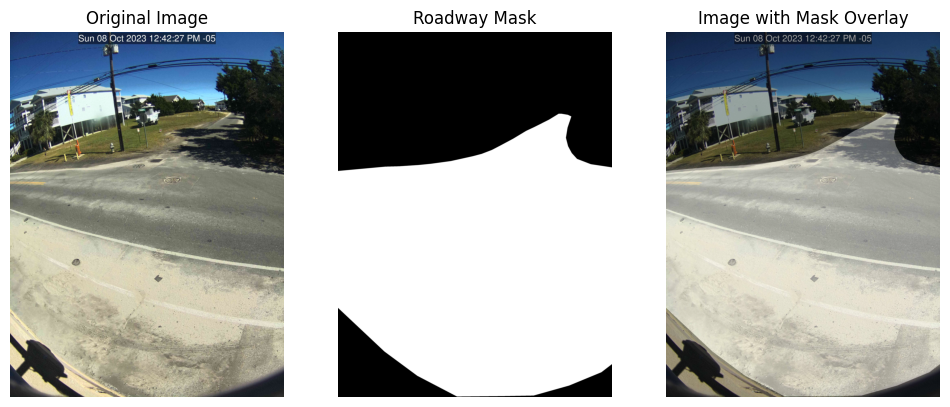

In [18]:
# Create a figure with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot the original image
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')  # Optionally remove axes

# Plot the roadway mask
axes[1].imshow(roadway_mask)
axes[1].set_title("Roadway Mask")
axes[1].axis('off')  # Optionally remove axes

# Plot the image with the overlaid mask
axes[2].imshow(image_rgb)
axes[2].imshow(roadway_mask, cmap='jet', alpha=0.35)  # Overlay mask with transparency
axes[2].set_title("Image with Mask Overlay")
axes[2].axis('off')  # Optionally remove axes

# Show the plots
plt.show()

# Quantify Number of Water Pixels in Roadway

## Generate Integer Labels from Predicted Segmentations

In [2]:
preds_folder = '/Users/ryan/Documents/image_processing/rectifications/CB_10022023_preds'
labels_destination = '/Users/ryan/Documents/image_processing/rectifications/CB_10022023_labels'

In [5]:
preds_folder = '/home/rmccune/depth_mapping/data/CB01_09272023/pred_segs'
labels_destination = '/home/rmccune/depth_mapping/data/CB01_09272023/labels'

In [6]:
create_labels_from_preds(preds_folder, labels_destination)

Generating labels from predictions:   0%|          | 0/31 [00:00<?, ?it/s]

Generating labels from predictions: 100%|██████████| 31/31 [00:03<00:00,  8.53it/s]


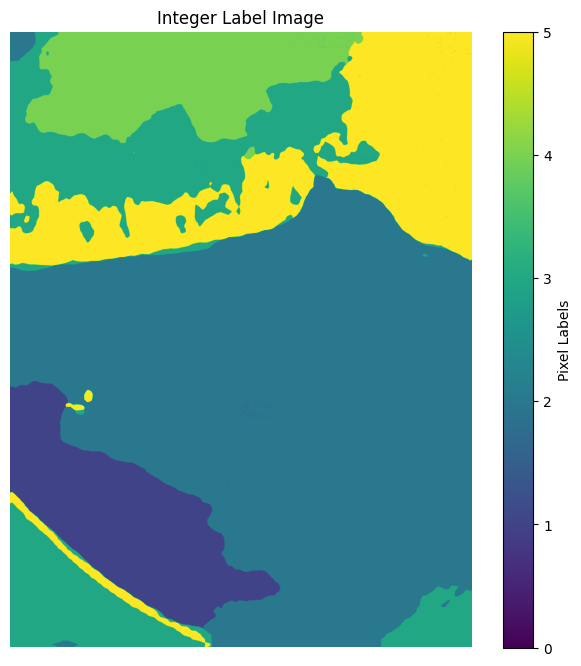

In [33]:
# Open the image using PIL
image_path = '/Users/ryan/Documents/image_processing/CB_03_modeled_test_set/prediction_labels/CAM_CB_03_20220820030632_predseg_labels.png'
img = Image.open(image_path)

# Convert the image to a NumPy array for easy manipulation
img_array = np.array(img)
# mask = img_array==1

# Plot the image using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(img_array, cmap='viridis')
plt.colorbar(label='Pixel Labels')
plt.title('Integer Label Image')
plt.axis('off')  # Turn off axis labels
plt.show()


## Quantify Water Pixels

In [2]:
roadway_mask = cv2.imread('roadway_mask.png')
roadway_mask = cv2.cvtColor(roadway_mask, cv2.COLOR_BGR2GRAY)

In [3]:
mask = np.array(roadway_mask) > 0

In [38]:
# Convert the image to a NumPy array for easy manipulation
image_path = '/Users/ryan/Documents/image_processing/CB_03_modeled_test_set/prediction_labels/CAM_CB_03_20220820030632_predseg_labels.png'
img = Image.open(image_path).convert('L')
img_array = np.array(img)
masked_image = np.where(mask, img_array, 0)

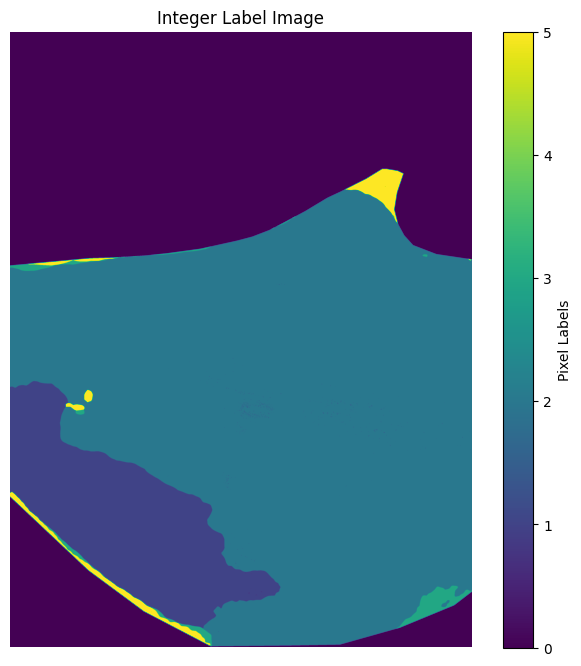

In [51]:

# Plot the image using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(masked_image, cmap='viridis')
plt.colorbar(label='Pixel Labels')
plt.title('Integer Label Image')
plt.axis('off')  # Turn off axis labels
plt.show()

In [10]:
# labels_folder = '/Users/ryan/Documents/image_processing/CB_03_modeled_test_set/prediction_labels'
labels_folder = '/Users/ryan/Documents/image_processing/rectifications/CB_10022023_labels'
roadway_mask_path = 'roadway_mask.png'

In [11]:
quantify_water_on_roadway(labels_folder, roadway_mask_path)

Quantifying water on the roadway: 100%|██████████| 44/44 [00:03<00:00, 12.62it/s]

Results saved to water_on_roadway.csv


# Visualize Segmentation and Quantification Results

In [19]:
def gen_segmap_overlays(image_folder, segs_folder, destination_folder=None, alpha=None, gamma=None,
                        color_map=None):
    """
        This function generates a folder of segmentation map overlays given a folder
        of original images and folder of predicted segmentations.
    :param image_folder: str
        Path of image folder.
    :param segs_folder: str
        Path of predicted segmentation folder.
    :param destination_folder: str
        Path to create folder for overlays.
    :param alpha: int
        Integer from 0 to 1 representing level of transparency for the foreground image.
        Default value is 0.5.
    :param gamma: int
        Additional weight for the cv2.addWeighted() function defaults to 0.0.
    :param color_map: dict
        Color map dictionary if using color map other than the default ten colors from
        plotly G10 palette.
    :return:
        The function will print a message after the task has completed but there are no
        variables returned.
    """
    # Create folder to store segmap overlays.
    # if destination_folder is None:
    #     destination_folder = 'segmentation_overlays'
    # if os.path.exists(destination_folder):
    #     os.makedirs(os.path.join(destination_folder,'/segmentation_overlays'))
    # else:
    #     print("Segmentation overlays folder already exists.")

    # Read in folders of images and segmentation maps.
    if not os.path.exists(image_folder):
        raise FileNotFoundError("Provided image folder path does not exist.")
    if not os.path.exists(segs_folder):
        raise FileNotFoundError("Provided segmentation map folder path does not exist.")

    # Collect image files
    image_files = [os.path.join(image_folder, filename) for filename in os.listdir(image_folder)
                   if not filename.startswith('.') and os.path.isfile(os.path.join(image_folder, filename))]

    # Collect segmentation map files
    segmap_files = [os.path.join(segs_folder, filename) for filename in os.listdir(segs_folder)
                    if not filename.startswith('.') and os.path.isfile(os.path.join(segs_folder, filename))]

    # Sort the files so that they match.
    image_files.sort()
    segmap_files.sort()

    # Confirm that the number of files match before running. Will exit otherwise.
    num_images = len(image_files)
    num_segmaps = len(segmap_files)
    if num_images == num_segmaps:
        # Initialize tqdm with the total number of files
        progress_bar = tqdm(total=num_images, desc="Generating segmentation overlays...")

        # Load images from each folder and run the overlays function.
        for i, (image_file, segmap_file) in enumerate(zip(image_files, segmap_files)):
            image = cv2.imread(image_file)
            segmap = cv2.imread(segmap_file)
            overlay_img = gen_overlay(image, segmap, alpha, gamma, color_map)
            cv2.imwrite(
                os.path.join(destination_folder, f'segmap_overlay_{os.path.basename(image_file)}'),
                overlay_img)

            # Clear memory
            image = None
            segmap = None

            # Update the progress bar
            progress_bar.update(1)
    else:
        print("Number of image files and segmentation maps did not match.")
        return

    # Close the progress bar
    progress_bar.close()

    return print("Folder of segmentation overlays generated.")

In [20]:
color_map = {
            '#3366CC': '#3366CC',
            '#DC3912': '#DC3912',
            '#FF9900': '#C1C4C9',
            '#109618': '#A2DDF2',
            '#990099': '#047511'
            }

In [12]:
from functions import *

In [21]:
gen_segmap_overlays('/home/rmccune/depth_mapping/data/CB01_09272023/orig_images',
                    '/home/rmccune/depth_mapping/data/CB01_09272023/pred_segs',
                    '/home/rmccune/depth_mapping/data/CB01_09272023/segmentation_overlays',
                    color_map=color_map)

































































Generating segmentation overlays...: 100%|██████████| 31/31 [00:34<00:00,  1.11s/it]

Folder of segmentation overlays generated.


In [8]:
images_folder = '/Users/ryan/Documents/image_processing/rectifications/CB_10022023'
overlays_folder = '/Users/ryan/Documents/image_processing/rectifications/segmap_overlays'
output_folder = 'CB_03_10022023_sidebyside_plots'
csv_file = 'water_on_roadway.csv'

In [9]:
def plot_images_side_by_side(images_folder, overlays_folder, output_folder, csv_file, dpi=250):
    """
    This function plots original images and overlay images from their respective folders side by side,
    and adds pixel count and percentage from a CSV file to the plot.
    
    :param images_folder: str
        Path to the folder containing the original images.
    :param overlays_folder: str
        Path to the folder containing the segmentation overlays.
    :param output_folder: str
        Path to place the side-by-side images.
    :param csv_file: str
        Path to the CSV file containing ImageName, Pixel Count, and Percent of Roadway.
    :param dpi: int
        The dpi for side-by-side plots. Default value of 250.
    :return: None
        There is no return from this function.
    """
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Extract the base name (first 23 characters) of ImageName for matching
    df['BaseName'] = df['ImageName'].str[:23]
    
    # Sort DataFrame by the base name
    df.sort_values('BaseName', inplace=True)

    # Get a list of files in each folder
    images = [os.path.join(images_folder, filename) for filename in
                   os.listdir(images_folder) if not filename.startswith('.')
                   and os.path.isfile(os.path.join(images_folder, filename))]
    overlays = [os.path.join(overlays_folder, filename) for filename in
                   os.listdir(overlays_folder) if not filename.startswith('.')
                   and os.path.isfile(os.path.join(overlays_folder, filename))]

    # Sort the files so that they match.
    images.sort()
    overlays.sort()

    # Ensure both folders have the same number of images
    if len(images) != len(overlays):
        print("Error: The two folders must contain the same number of images.")
        return

    with tqdm(total=len(images), desc='Generating side-by-sides') as pbar:
        for image, overlay in zip(images, overlays):
            # Extract the base name (without folder path) for comparison
            base_name = os.path.basename(image)[:23]

            # Find the corresponding row in the CSV using the BaseName column
            row = df[df['BaseName'] == base_name].iloc[0]
            pixel_count = row['Pixel Count']
            percent_roadway = row['Percent of Roadway']

            # Open images from both folders
            img1 = Image.open(image)
            img2 = Image.open(overlay)

            # Create a new figure
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))

            # Plot images side by side
            axes[0].imshow(img1)
            axes[0].axis('off')
            axes[0].set_title('Original Image')

            axes[1].imshow(img2)
            axes[1].axis('off')
            axes[1].set_title('Segmentation Overlay')

            # Add text with pixel count and percentage
            fig.suptitle(f"Total Number of Pixels Classified as Water: {pixel_count} \n Percent of Pixels in Roadway Classified as Water: {percent_roadway:.2f}%", 
                         fontsize=12)

            fig.subplots_adjust(top=0.85)

            # Save the figure to the output folder
            output_file = os.path.join(output_folder, f'side_by_side_{os.path.basename(image)}')
            plt.savefig(output_file, bbox_inches='tight', dpi=dpi)
            plt.close(fig)

            # Update the progress bar
            pbar.update(1)

    return print(f"Side by side images saved successfully.")

In [11]:
plot_images_side_by_side(images_folder, overlays_folder, output_folder, csv_file)

Generating side-by-sides: 100%|██████████| 44/44 [00:45<00:00,  1.04s/it]

Side by side images saved successfully.
